<a href="https://colab.research.google.com/github/Julian-quintero/miniProyect1-signals3/blob/main/mini_proyecto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mini proyecto 1

**Autores:**
- Sindy Natalia Duque Quintero.
- Julian Andres Quintero

**Tratamiento de Señales III**

**Facultad de Ingeniería**

**Universidad de Antioquia**

In [ ]:
#s17
#https://drive.google.com/file/d/1bMObQcIFrNalRmD1LaNuqVSTeqaeGqR3/view?usp=drive_link
!gdown '1bMObQcIFrNalRmD1LaNuqVSTeqaeGqR3'

#s16
#https://drive.google.com/file/d/1cBN0CYdrsUsVO77PyNq-Jkyh5pc0FI22/view?usp=drive_link
!gdown '1cBN0CYdrsUsVO77PyNq-Jkyh5pc0FI22'

#s15
#https://drive.google.com/file/d/1Fu3HL-cB64lTfuZS8iPhIfaJIsl1OszD/view?usp=drive_link
!gdown '1Fu3HL-cB64lTfuZS8iPhIfaJIsl1OszD'

#s14
#https://drive.google.com/file/d/1cNMil1P60z-XrqExnnKvmggmXWhI3glZ/view?usp=drive_link
!gdown '1cNMil1P60z-XrqExnnKvmggmXWhI3glZ'


Downloading...
From: https://drive.google.com/uc?id=1bMObQcIFrNalRmD1LaNuqVSTeqaeGqR3
To: /content/s17.mat
100% 80.7M/80.7M [00:00<00:00, 124MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cBN0CYdrsUsVO77PyNq-Jkyh5pc0FI22
To: /content/s16.mat
100% 80.8M/80.8M [00:00<00:00, 83.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Fu3HL-cB64lTfuZS8iPhIfaJIsl1OszD
To: /content/s15.mat
100% 80.7M/80.7M [00:00<00:00, 133MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cNMil1P60z-XrqExnnKvmggmXWhI3glZ
To: /content/s14.mat
100% 80.6M/80.6M [00:00<00:00, 91.4MB/s]


In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal as sp
from scipy import signal
import seaborn as sns

In [2]:
# Carga de la informacion de cada persona
datosP1 = sio.loadmat('s14.mat')
datosP2 = sio.loadmat('s15.mat')
datosP3 = sio.loadmat('s16.mat')
datosP4 = sio.loadmat('s17.mat')

## Señales Fisiológicas periféricas

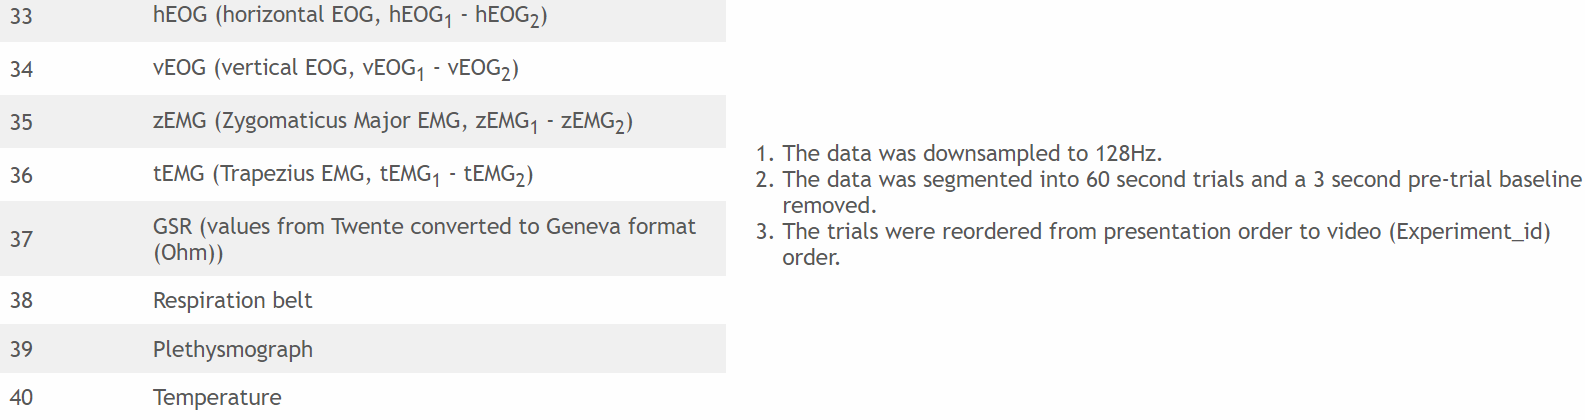

In [3]:
# Carga de datos
etiquetas = datosP1['labels']
etiquetas2 = datosP2['labels']
etiquetas3 = datosP3['labels']
etiquetas4 = datosP4['labels']
signalP1 = datosP1['data']## Esto me arrojará un nd array de n_video * id_signal * Ntimepoints
signalP2 = datosP2['data']
signalP3 = datosP3['data']
signalP4 = datosP4['data']

# Caracteristicas seleccionadas

### Características de la Respuesta Galvanica de la Piel (GSR)

* Resistencia Promedio de la Piel: Se obtiene al calcular el promedio de las observaciones.

* Promedio de la Derivada: Implica el cálculo de la derivada numérica (mediante np.diff) y luego se determina su promedio.

* Promedio de la Derivada para Valores Negativos (Tasa Promedio de Disminución durante el Tiempo de Decaimiento): Similar a la característica anterior, se calcula la derivada, pero esta vez se toman en cuenta solo los valores negativos.

###  Características de la Presión del Volumen Sanguineo

* Ratio Energético entre las Bandas de Frecuencia [0.04-0.15]Hz y [0.15-0.5]Hz: Se aplica un filtro a la señal en las bandas especificadas. Luego, se calcula la energía para cada banda filtrada de manera independiente utilizando la fórmula ∑∞−∞|x[n]|2. Finalmente, se determina la razón entre ambas bandas.

* Potencia Espectral en las Bandas [0.1-0.2]Hz: Se comienza aplicando un filtro en la banda mencionada. Sin embargo, para optimizar la respuesta del filtro, se expande el rango a [0.08-0.22]Hz. A continuación, se calcula la máxima potencia de la señal filtrada utilizando Welch.

* Potencia Espectral en la Banda de Alta Frecuencia [0.15-0.5]Hz: Similar al caso anterior, se filtra la señal y se determina su máxima potencia. Es importante mencionar que el rango de frecuencia del filtro se mantiene en [0.15-0.5]Hz.

### Características del Patrón de Respiración

* Ratio Energético de Bandas (Hace referencia a la diferencia entre el logaritmo de la energía de las bandas filtradas correspondiente a [0.05-0.25]Hz y [0.25-5]Hz): Se aplican los filtros en los rangos necesarios. La energía se calcula siguiendo la expresión ∑∞−∞|x[n]|2 y se utiliza la función logaritmo de NumPy para obtener la diferencia.

* Promedio de la Señal de Respiración: Se calcula determinando el promedio de cada una de las observaciones.

* Media de la Derivada (Variación de la Señal de Respiración): Se calcula la derivada numérica (usando np.diff) y luego se determina su promedio.

###  Características de la Temperatura de la Piel

* Promedio: Se determina calculando el promedio de cada una de las observaciones

* Promedio de su Derivada: Se calcula la derivada numérica (usando np.diff) y luego se determina su promedio.

* Potencia Espectral en las Bandas [0.1-0.2]Hz: Inicialmente se aplica un filtro en la banda especificada. Posteriormente, se calcula la máxima potencia de la señal filtrada utilizando Welch.

### Características de la Electromiografia(EMG) y Electrooculograma(EOG)

* Energía de la Señal: Se elige la Señal Vertical EOG para realizar el cálculo de la energía utilizando la expresión ∑∞−∞|x[n]|2, y luego se aplica el logaritmo correspondiente utilizando NumPy para obtener la diferencia.

* Promedio: Se elige el EMG del Músculo Zygomaticus Major para determinar el promedio de cada una de las observaciones

* Varianza de la Señal: Se elige el EMG del Músculo Trapezius para determinar la varianza de cada una de las observaciones

### Características del Electroencefalograma(EEG)

* El EEG consta de 32 señales independientes correspondientes a electrodos. Para nuestros cálculos, seleccionamos T7 y T8.

* Potencia Espectral en la Banda Beta T7 [14-30]Hz: Se aplica inicialmente un filtro en la banda especificada. Luego, se calcula la máxima potencia de la señal filtrada utilizando Welch.

* Potencia Espectral en la Banda Beta T8 [14-30]Hz: Similar al caso anterior, se aplica un filtro en la banda especificada y luego se calcula la máxima potencia de la señal filtrada utilizando Welch.

* Asimetría de la Potencia Espectral en la Banda Beta [14-30]Hz entre T7 y T8: La asimetría para el par de electrodos T7 y T8 se define como T7 - T8. Se aplica un filtro en la banda especificada y luego se calcula la máxima potencia de la señal filtrada utilizando Welch.

In [4]:
def featuresGSR(signalFromVideo):

  dbGSR = signalP1[:,36,:]
  averageSkinResistance = []
  averageDerivate = []
  averageDerivateNegative = []

  for i in range(0,40): # hacemos un loop de los 40 videos y sacamos las respectivas caracteristicas

    meanGSR = np.mean(dbGSR[i,:])
    diffGSR = np.diff(dbGSR[i,:])
    averageSkinResistance.append(meanGSR)
    averageDerivate.append(np.mean(diffGSR))
    derivate = diffGSR
    averageDerivateNegative.append(np.mean(derivate[np.where(derivate<0)]))

  #convertimos a un arreglo numpy.

  averageSkinResistance = np.array(averageSkinResistance)
  averageDerivate = np.array(averageDerivate)
  averageDerivateNegative = np.array(averageDerivateNegative)

  return averageSkinResistance, averageDerivate, averageDerivateNegative



In [5]:
def chebyFilterBandpass(f_s, f_c, f_c2, n_order, signal_2filter):
  # Funcion encargada de realizar el filtro entre frecuencias de corte

  wc_norm = 2*(f_c/f_s)         # Rango de frecuencia de cortes normalizadas
  wc2_norm = 2*(f_c2/f_s)

  sos = sp.cheby1(n_order, 0.001, [wc_norm, wc2_norm], 'bandpass', analog=False, output='sos')
  # respuesta en frecuencia del filtro
  w, h = signal.sosfreqz(sos, worN=1500)

  # filtro aplicado
  filtered = sp.sosfilt(sos, signal_2filter)

  return filtered

In [6]:
def featuresBloodVolumePressure(signalFromVideo, f_s):

  BloodVolumePressure = signalFromVideo[:,38,:]
  energyRatio = []
  spectralPowerBand1 = []
  spectralPowerBandHigh = []

  for i in range(40):
    #energy ratio bands [0.04-0.15]Hz and [0.15-0.5]Hz,
    signalBVP_FilteredEnergy1 = chebyFilterBandpass(f_s, 0.04, 0.15, 20, BloodVolumePressure[i,:])
    signalBVP_FilteredEnergy2 = chebyFilterBandpass(f_s, 0.15, 0.5, 20, BloodVolumePressure[i,:])
    energyRatio.append(np.sum(np.abs(signalBVP_FilteredEnergy1)**2)/ np.sum(np.abs(signalBVP_FilteredEnergy2)**2))

    #spectral Power Band [0.1-0.2]Hz, el filtro se fija con frecuencias [0.08-0.22]
    #con el fin de filtrar mejor la señal entre la banda de interes
    signalBVP_Filtered1 = chebyFilterBandpass(f_s, 0.08, 0.22, 20, BloodVolumePressure[i,:])
    f1, Pxx_den1 = sp.welch(signalBVP_Filtered1, f_s, nperseg=1024)
    spectralPowerBand1.append(np.max(Pxx_den1))

    #spectral Power Band [0.15-0.5]Hz
    signalBVP_FilteredHigh = chebyFilterBandpass(f_s, 0.15, 0.5, 20, BloodVolumePressure[i,:])
    fHigh, Pxx_denHigh = sp.welch(signalBVP_FilteredHigh, f_s, nperseg=1024)
    spectralPowerBandHigh.append(np.max(Pxx_denHigh))

  energyRatio = np.array(energyRatio)
  spectralPowerBand1 = np.array(spectralPowerBand1)
  spectralPowerBandHigh = np.array(spectralPowerBandHigh)

  return energyRatio, spectralPowerBand1, spectralPowerBandHigh

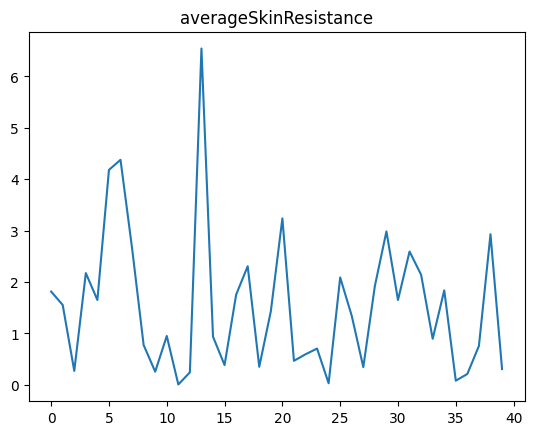

In [7]:
averageSkinResistance, averageDerivate, averageDerivateNegative = featuresBloodVolumePressure(signalP4,128)
plt.plot(averageSkinResistance)
#print(averageSkinResistance[0])
plt.title('averageSkinResistance')
plt.show()

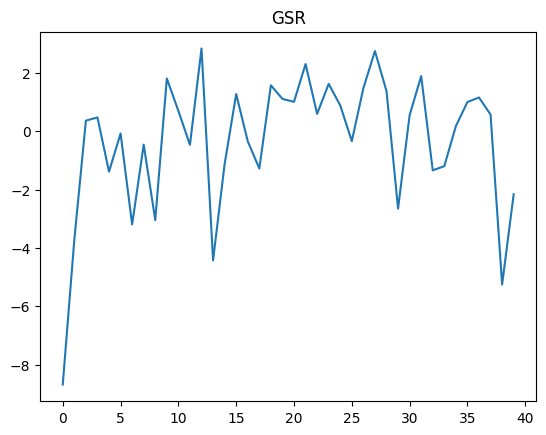

In [8]:
averageSkinResistance, averageDerivate, averageDerivateNegative = featuresGSR(signalP4)
plt.plot(averageDerivate)
#print(averageSkinResistance[0])
plt.title('GSR')
plt.show()

In [9]:
def featuresRespirationPattern(signalFromVideo, f_s):
  RespirationPattern = signalFromVideo[:,37,:]

  energyRatio = []
  averageRespirationSignal = []
  averageDerivate = []

  for i in range(40):
    #energy ratio bands [0.05-0.25]Hz and [0.25-5]Hz (difference between the logarithm)
    signalRespirationPatternFilteredEnergyFirst = chebyFilterBandpass(f_s, 0.05, 0.25, 20, RespirationPattern[i,:])
    signalRespirationPatternFilteredEnergySecond = chebyFilterBandpass(f_s, 0.25, 0.5, 20, RespirationPattern[i,:])
    energyRatio.append(np.log(np.sum(np.abs(signalRespirationPatternFilteredEnergyFirst)**2)) - np.log(np.sum(np.abs(signalRespirationPatternFilteredEnergySecond)**2)))
    averageRespirationSignal.append(np.nanmean(RespirationPattern[i,:]))
    averageDerivate.append(np.nanmean(np.diff(RespirationPattern[i,:])))

  energyRatio = np.array(energyRatio)
  averageRespirationSignal = np.array(averageRespirationSignal)
  averageDerivate = np.array(averageDerivate)

  return energyRatio, averageRespirationSignal, averageDerivate

In [10]:
energyRatio, averageRespirationSignal, averageDerivate = featuresRespirationPattern(signalP4,128)

In [11]:
def featuresSkinTemperature(signalFromVideo, f_s):
  SkinTemperature = signalFromVideo[:,39,:]
  averageSkinTemperature = []
  averageDerivate = []
  spectralPower = []

  for i in range(SkinTemperature.shape[0]):
    averageSkinTemperature.append(np.nanmean(SkinTemperature[i,:]))
    averageDerivate.append(np.nanmean(np.diff(SkinTemperature[i,:])))

    #banda de espectro entre  [0.1-0.2]Hz
    signalSkinTemperature_Filtered = chebyFilterBandpass(f_s, 0.1, 0.2, 20, SkinTemperature[i,:])
    f, Pxx_den = sp.welch(signalSkinTemperature_Filtered, f_s, nperseg=1024)
    spectralPower.append(np.max(Pxx_den))

  #convertimos a arreglos np
  averageSkinTemperature = np.array(averageSkinTemperature)
  averageDerivate = np.array(averageDerivate)
  spectralPower = np.array(spectralPower)

  return averageSkinTemperature, averageDerivate, spectralPower

In [12]:
def featuresEOGandEMG(signalFromVideo, f_s):
  hEOG = signalFromVideo[:,32,:]
  vEOG = signalFromVideo[:,33,:]
  zEMG = signalFromVideo[:,34,:]
  tEMG = signalFromVideo[:,35,:]

  energyvEOG = []
  averagezEMG = []
  variancetEMG = []

  for i in range(vEOG.shape[0]):
    energyvEOG.append(np.sum(np.abs(vEOG[i,:])**2))

    averagezEMG.append(np.nanmean(zEMG[i,:]))

    variancetEMG.append(np.var(tEMG[i,:]))

  energyvEOG = np.array(energyvEOG)
  averagezEMG = np.array(averagezEMG)
  variancetEMG = np.array(variancetEMG)

  return energyvEOG, averagezEMG, variancetEMG

In [13]:
def featuresEEG(signalFromVideo, f_s):

  #T7-T8
  EEGT7 =signalFromVideo[:,7,:]
  EEGT8 =signalFromVideo[:,25,:]

  # Asimetría la restamos por convención el hemisferio izq del der (T7-T8) y tomamos la banda beta 14-30HZ
  asymmetry = EEGT7-EEGT8

  spectralPowerEEGT7 = []
  spectralPowerEEGT8 = []
  spectralPowerAsymmetry = []

  for i in range(EEGT7.shape[0]):
    #Potencia Espectral Banda beta EEG T7 [14-30]Hz
    signalEEGT7_Filtered = chebyFilterBandpass(f_s, 14, 30, 20, EEGT7[i,:])
    f, Pxx_den = sp.welch(signalEEGT7_Filtered, f_s, nperseg=1024)
    spectralPowerEEGT7.append(np.max(Pxx_den))

    # Potencia Espectral Banda beta EEG T8 [14-30]Hz
    signalEEGT8_Filtered = chebyFilterBandpass(f_s, 14, 30, 20, EEGT8[i,:])
    f, Pxx_den = sp.welch(signalEEGT8_Filtered, f_s, nperseg=1024)
    spectralPowerEEGT8.append(np.max(Pxx_den))

    #Asimetría de Potencia Espectral en la Banda Beta [14-30]Hz
    signalAsymmetry_Filtered = chebyFilterBandpass(f_s, 14, 30, 20, asymmetry[i,:])
    f, Pxx_den = sp.welch(signalAsymmetry_Filtered, f_s, nperseg=1024)
    spectralPowerAsymmetry.append(np.max(Pxx_den))

  spectralPowerEEGT7 = np.array(spectralPowerEEGT7)
  spectralPowerEEGT8 = np.array(spectralPowerEEGT8)
  spectralPowerAsymmetry = np.array(spectralPowerAsymmetry)

  return spectralPowerEEGT7, spectralPowerEEGT8, spectralPowerAsymmetry

In [14]:
def featuresMatrix(dataX, f_s, labels_Matrix):

  featureMatrix = np.zeros((19,40))
  featureMatrix[0:3] = featuresGSR(dataX)
  featureMatrix[3:6] = featuresBloodVolumePressure(dataX, f_s)
  featureMatrix[6:9] = featuresRespirationPattern(dataX, f_s)
  featureMatrix[9:12] = featuresSkinTemperature(dataX, f_s)
  featureMatrix[12:15] = featuresEOGandEMG(dataX, f_s)
  featureMatrix[15:18] = featuresEEG(dataX, f_s)
  featureMatrix[18] =  labels_Matrix

  return featureMatrix.T

In [15]:
labels = datosP1['labels']

happy = 'happy' # Etiqueta númerica 1 feliz
angry = 'angry' # Etiqueta númerica 2 enojado
bored = 'bored' # Etiqueta númerica 3 aburrido
peaceful = 'peaceful' # Etiqueta númerica 4 tranquilo

Valence = labels[:,0]
Arousal = labels[:,1]

happy_Arousal = np.logical_and(Arousal>4.5,Arousal<9) # Arousal $[4.5,9]$
happy_Valence = np.logical_and(Valence>4.5,Valence<9) # Valencia $[4.5,9]$
happy_IndexLabels = np.where(np.logical_and(happy_Arousal,happy_Valence))

angry_Arousal = np.logical_and(Arousal>4.5,Arousal<9) # Arousal $[4.5,9]$
angry_Valence = np.logical_and(Valence>0,Valence<4.5) # Valencia $[0,4.5]$
angry_IndexLabels = np.where(np.logical_and(angry_Arousal,angry_Valence))

bored_Arousal = np.logical_and(Arousal>0,Arousal<4.5) # Arousal $[0,4.5]$
bored_Valence = np.logical_and(Valence>0,Valence<4.5) # Valencia $[0,4.5]$
bored_IndexLabels = np.where(np.logical_and(bored_Arousal,bored_Valence))

peaceful_Arousal = np.logical_and(Arousal>0,Arousal<4.5) # Arousal $[0,4.5]$
peaceful_Valence = np.logical_and(Valence>4.5,Valence<9) # Valencia $[4.5,9]$
peaceful_IndexLabels = np.where(np.logical_and(peaceful_Arousal,peaceful_Valence))

labels = np.zeros((labels.shape[0]))

labels[happy_IndexLabels] = 1
labels[angry_IndexLabels] = 2
labels[bored_IndexLabels] = 3
labels[peaceful_IndexLabels] = 4

In [ ]:
labels2 = datosP2['labels']

happy = 'happy' # Etiqueta númerica 1 feliz
angry = 'angry' # Etiqueta númerica 2 enojado
bored = 'bored' # Etiqueta númerica 3 aburrido
peaceful = 'peaceful' # Etiqueta númerica 4 tranquilo

Valence = labels[:,0]
Arousal = labels[:,1]

happy_Arousal = np.logical_and(Arousal>4.5,Arousal<9) # Arousal $[4.5,9]$
happy_Valence = np.logical_and(Valence>4.5,Valence<9) # Valencia $[4.5,9]$
happy_IndexLabels = np.where(np.logical_and(happy_Arousal,happy_Valence))

angry_Arousal = np.logical_and(Arousal>4.5,Arousal<9) # Arousal $[4.5,9]$
angry_Valence = np.logical_and(Valence>0,Valence<4.5) # Valencia $[0,4.5]$
angry_IndexLabels = np.where(np.logical_and(angry_Arousal,angry_Valence))

bored_Arousal = np.logical_and(Arousal>0,Arousal<4.5) # Arousal $[0,4.5]$
bored_Valence = np.logical_and(Valence>0,Valence<4.5) # Valencia $[0,4.5]$
bored_IndexLabels = np.where(np.logical_and(bored_Arousal,bored_Valence))

peaceful_Arousal = np.logical_and(Arousal>0,Arousal<4.5) # Arousal $[0,4.5]$
peaceful_Valence = np.logical_and(Valence>4.5,Valence<9) # Valencia $[4.5,9]$
peaceful_IndexLabels = np.where(np.logical_and(peaceful_Arousal,peaceful_Valence))

labels = np.zeros((labels.shape[0]))

labels[happy_IndexLabels] = 1
labels[angry_IndexLabels] = 2
labels[bored_IndexLabels] = 3
labels[peaceful_IndexLabels] = 4

In [16]:
labels3 = datosP3['labels']

happy = 'happy' # Etiqueta númerica 1 feliz
angry = 'angry' # Etiqueta númerica 2 enojado
bored = 'bored' # Etiqueta númerica 3 aburrido
peaceful = 'peaceful' # Etiqueta númerica 4 tranquilo

Valence = labels[:,0]
Arousal = labels[:,1]

happy_Arousal = np.logical_and(Arousal>4.5,Arousal<9) # Arousal $[4.5,9]$
happy_Valence = np.logical_and(Valence>4.5,Valence<9) # Valencia $[4.5,9]$
happy_IndexLabels = np.where(np.logical_and(happy_Arousal,happy_Valence))

angry_Arousal = np.logical_and(Arousal>4.5,Arousal<9) # Arousal $[4.5,9]$
angry_Valence = np.logical_and(Valence>0,Valence<4.5) # Valencia $[0,4.5]$
angry_IndexLabels = np.where(np.logical_and(angry_Arousal,angry_Valence))

bored_Arousal = np.logical_and(Arousal>0,Arousal<4.5) # Arousal $[0,4.5]$
bored_Valence = np.logical_and(Valence>0,Valence<4.5) # Valencia $[0,4.5]$
bored_IndexLabels = np.where(np.logical_and(bored_Arousal,bored_Valence))

peaceful_Arousal = np.logical_and(Arousal>0,Arousal<4.5) # Arousal $[0,4.5]$
peaceful_Valence = np.logical_and(Valence>4.5,Valence<9) # Valencia $[4.5,9]$
peaceful_IndexLabels = np.where(np.logical_and(peaceful_Arousal,peaceful_Valence))

labels = np.zeros((labels.shape[0]))

labels[happy_IndexLabels] = 1
labels[angry_IndexLabels] = 2
labels[bored_IndexLabels] = 3
labels[peaceful_IndexLabels] = 4

In [17]:
labels4 = datosP4['labels']

happy = 'happy' # Etiqueta númerica 1 feliz
angry = 'angry' # Etiqueta númerica 2 enojado
bored = 'bored' # Etiqueta númerica 3 aburrido
peaceful = 'peaceful' # Etiqueta númerica 4 tranquilo

Valence = labels[:,0]
Arousal = labels[:,1]

happy_Arousal = np.logical_and(Arousal>4.5,Arousal<9) # Arousal $[4.5,9]$
happy_Valence = np.logical_and(Valence>4.5,Valence<9) # Valencia $[4.5,9]$
happy_IndexLabels = np.where(np.logical_and(happy_Arousal,happy_Valence))

angry_Arousal = np.logical_and(Arousal>4.5,Arousal<9) # Arousal $[4.5,9]$
angry_Valence = np.logical_and(Valence>0,Valence<4.5) # Valencia $[0,4.5]$
angry_IndexLabels = np.where(np.logical_and(angry_Arousal,angry_Valence))

bored_Arousal = np.logical_and(Arousal>0,Arousal<4.5) # Arousal $[0,4.5]$
bored_Valence = np.logical_and(Valence>0,Valence<4.5) # Valencia $[0,4.5]$
bored_IndexLabels = np.where(np.logical_and(bored_Arousal,bored_Valence))

peaceful_Arousal = np.logical_and(Arousal>0,Arousal<4.5) # Arousal $[0,4.5]$
peaceful_Valence = np.logical_and(Valence>4.5,Valence<9) # Valencia $[4.5,9]$
peaceful_IndexLabels = np.where(np.logical_and(peaceful_Arousal,peaceful_Valence))

labels = np.zeros((labels.shape[0]))

labels[happy_IndexLabels] = 1
labels[angry_IndexLabels] = 2
labels[bored_IndexLabels] = 3
labels[peaceful_IndexLabels] = 4

In [18]:
#Sacamos las caracteristicas para cada persona

features = featuresMatrix(signalP1, 128, labels)
features2 = featuresMatrix(signalP2, 128, labels)
features3 = featuresMatrix(signalP3, 128, labels)
features4 = featuresMatrix(signalP4, 128, labels)

titles = ['GSR_Average', 'GSR_AverageDerivate', 'GSR_AverageDerivateNeg',
           'BVP_EnergyRatio', 'BVP_SpectralPowerBand1', 'BVP_SpectralPowerBand2',
           'RP_EnergyRatio', 'RP_Average', 'RP_AverageDerivate',
           'ST_Average', 'ST_AverageDerivate', 'ST_SpectralPower',
           'vEOG_Energy', 'zEMG_Average', 'tEMG_Variance',
           'EEGT7_SpectralPower', 'EEGT8_SpectralPower', 'Asymmetry_SpectralPower',
           'Emotion']

dataFrame = pd.DataFrame(data = features, columns= titles)

In [19]:
dataFrame

,GSR_Average,GSR_AverageDerivate,GSR_AverageDerivateNeg,BVP_EnergyRatio,BVP_SpectralPowerBand1,BVP_SpectralPowerBand2,RP_EnergyRatio,RP_Average,RP_AverageDerivate,ST_Average,ST_AverageDerivate,ST_SpectralPower,vEOG_Energy,zEMG_Average,tEMG_Variance,EEGT7_SpectralPower,EEGT8_SpectralPower,Asymmetry_SpectralPower,Emotion
0,-18005.683435,-8.677097,-68.221979,2.359967,3.536807e+06,1.099356e+07,0.641664,1236.911337,0.592404,-0.075441,-3.830195e-05,1.333602e-07,2.279456e+08,-163.959936,64728.585821,8.033231,17.483263,5.721463,2.0
1,-8794.650746,-3.715479,-61.479264,0.745861,7.185314e+05,3.629858e+06,1.482578,-820.366672,-0.230647,-0.054506,-1.256304e-05,4.350634e-08,2.998559e+08,-113.784927,14631.755595,7.533258,13.767835,7.387248,1.0
2,-1331.408630,0.360847,-14.131859,1.280795,3.059868e+06,1.324450e+06,0.422623,-2707.540953,-0.535084,-0.132064,-3.922119e-05,9.213752e-08,2.822916e+07,-103.645211,19001.371419,8.834816,18.256681,6.085371,1.0
3,3491.283824,0.470205,-25.698948,9.849666,9.955558e+06,2.653545e+06,1.908269,252.170543,-0.301650,-0.017212,-7.660389e-06,1.406702e-08,1.003281e+08,39.753148,39808.699543,6.790325,13.677677,5.718186,1.0
4,-3736.386024,-1.386627,-35.101501,1.052855,1.543753e+07,1.079800e+07,0.559027,-1270.623131,-0.589593,-0.060590,-3.631024e-05,2.534259e-07,3.809139e+08,-50.922705,262354.178870,7.938624,18.183957,6.939304,1.0
5,-848.909184,-0.078365,-20.327468,1.412317,2.516609e+06,1.872884e+06,-0.210370,-896.817617,-0.157097,-0.093039,-2.543249e-05,5.355933e-08,1.411505e+08,73.843815,45066.093545,9.049290,20.114635,9.241485,1.0
6,-8999.583679,-3.196157,-29.533955,1.712057,6.804679e+05,1.190196e+06,-0.210256,-1034.814245,-0.299156,-0.113153,-3.508458e-05,1.034430e-08,3.351992e+07,16.810894,42920.480199,7.334781,21.967153,7.556561,1.0
7,-517.923350,-0.462282,-29.539575,2.412820,1.073624e+07,4.754042e+06,-0.179616,-595.614598,-0.184029,-0.058141,-4.136610e-06,5.009220e-08,2.929020e+08,-190.245474,649879.686875,5.132884,15.297365,6.713173,1.0
8,-9165.069658,-3.045572,-44.165919,2.205628,1.549917e+07,7.581052e+06,0.451769,-1674.661787,-0.143313,0.114839,2.650495e-05,5.549701e-08,1.010856e+08,-149.249178,10025.882981,5.556953,15.849229,6.821969,1.0
9,5519.865947,1.803618,-12.748425,0.013965,1.203018e+05,1.639890e+06,1.295087,-1898.667778,-0.433650,0.346654,9.514203e-05,1.346198e-07,2.979135e+08,-21.916037,94705.588282,5.086112,12.100685,6.529422,1.0


In [ ]:
sns.pairplot(dataFrame, hue="GSR_Average")

#Conclusiones

A partir del proceso de identificación de rasgos y su correspondiente representación gráfica a través de Seaborn, se observó que, aunque no proporcionan una separación completamente definida, se distingue una cierta inclinación que permitiría discernir los datos entre las cuatro categorías emocionales. Esta sutil tendencia podría ser una pista valiosa para comprender mejor las complejidades de las emociones humanas y su representación en datos. Es importante destacar que esta tendencia fue perceptible para ciertos pares de características, y no para el conjunto en su totalidad.

Al seleccionar cuatro categorías emocionales del conjunto de emociones, se simplifica la complejidad del problema y, por ende, la dificultad de distinguir entre clases (emociones). Sin embargo, como se mencionó previamente, las características no facilitan una marcada distinción. Esto posiblemente se debe a la naturaleza inherente de las señales y su proceso de adquisición, que en cierta medida no se consideraron completamente durante la realización de este estudio. Sería interesante explorar en futuras investigaciones cómo otros factores pueden influir en la capacidad de discernir emociones a partir de estas señales.